In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read dataset 'Wholesale customers data' and perform explorational analysis.

In [2]:
df = pd.read_excel('Wholesale customers data.xlsx', engine='openpyxl')

In [3]:
# Remove Region - qualitative value, not useful for KMeans
df = df.drop('Region', axis=1)
df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [4]:
# Get info about variables
df.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A29F017F0>,
      dtype=object)

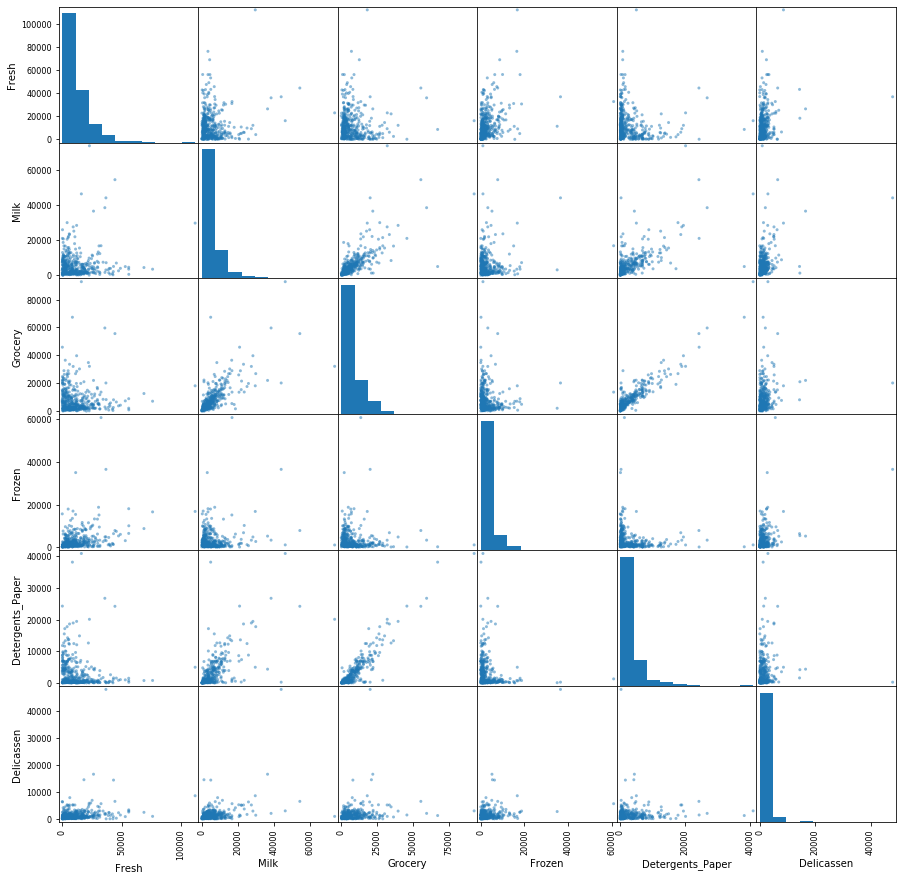

In [5]:
# Vizualization
df1 = df.drop("Channel", axis = 1)
from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize = (15,15))

In [6]:
# Correlation matrix
df1.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


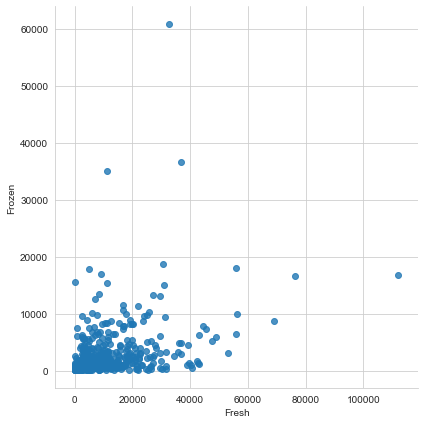

In [7]:
# Scatterplot 2 categories
sns.set_style('whitegrid')
sns.lmplot('Fresh', 'Frozen', data=df,
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

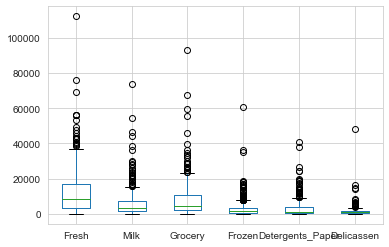

In [8]:
# Box and whiskers plot
df.drop("Channel", axis=1).boxplot()

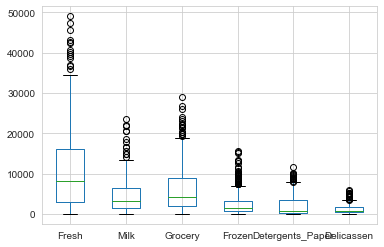

In [9]:
# Standardize
for column in df.columns:
    df = df[np.abs(df[column] - df[column].mean()) <= (3 * df[column].std())]

df.drop("Channel", axis=1).boxplot()

In [10]:
df.shape

(396, 7)

In [11]:
(440 - 396) / 440 # Outliers amount was 10% of base dataset

0.1

## EDA

In [12]:
# Count per channel
df['Channel'].value_counts()

1    282
2    114
Name: Channel, dtype: int64

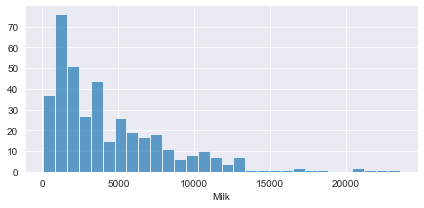

In [13]:
# Histogram 1
sns.set_style('darkgrid')
g = sns.FacetGrid(df, palette='Set1', aspect=2)
g = g.map(plt.hist, 'Milk', bins=30, alpha=0.7)

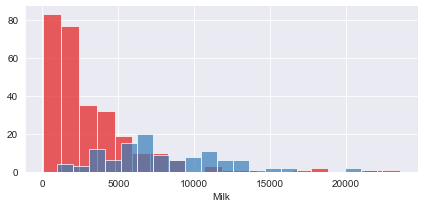

In [14]:
# Histogram 2
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Channel", palette='Set1', aspect=2)
g = g.map(plt.hist, 'Milk', bins=20, alpha=0.7)

## K Means Cluster 

### 1. Approach
- Segmentation of all customers 

In [15]:
from sklearn.cluster import KMeans

Standardization

In [16]:
dfs = df.copy()

for column in dfs.columns:
    if column != 'Channel':
        dfs[column] = (dfs[column] - dfs[column].mean()) / dfs[column].std()

In [17]:
dfs.shape

(396, 7)

Elbow method for best cluster number selection

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

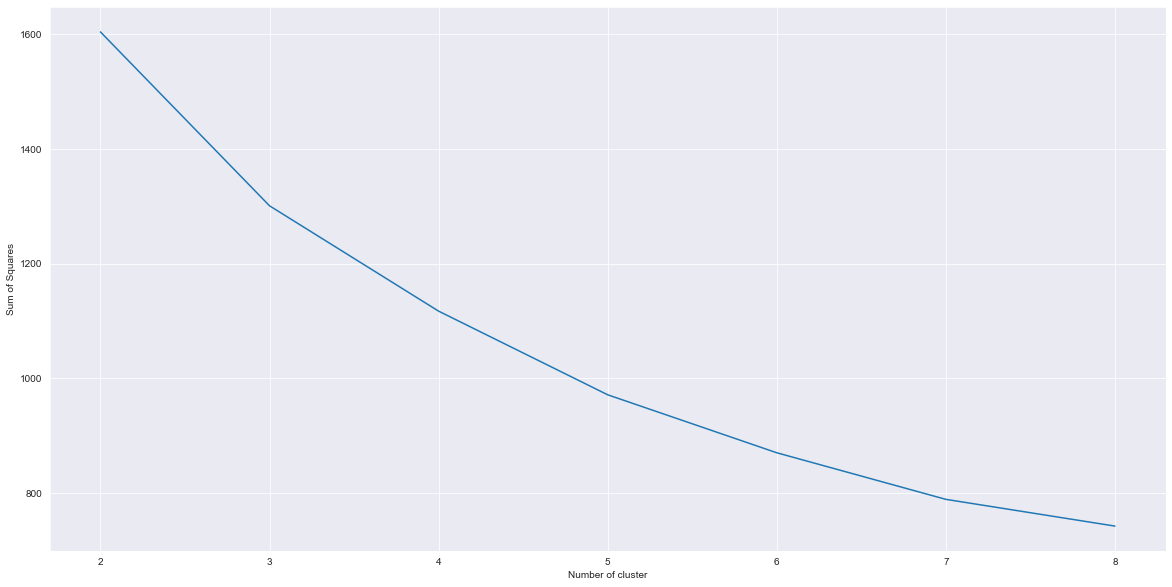

In [18]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
sse = {}
pseudo_F = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=100, random_state=123).fit(dfs.drop('Channel', axis=1))
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    labels = kmeans.labels_
    pseudo_F[k] = metrics.calinski_harabasz_score(dfs.drop('Channel',axis = 1), labels)
    plt.figure(figsize=(20, 10))
plt.xticks(range(2,9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squares")
plt.show()

In [19]:
#statystyki pseudo F dla liczby klastrow
pd.DataFrame.from_dict(pseudo_F, columns = ["pseudo-F"] ,orient = "index")

,pseudo-F
2,187.971586
3,161.415822
4,146.485342
5,140.733560
6,134.418122
7,129.916191
8,121.531488


In [20]:
dfs.drop('Channel', axis=1).head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.181978,1.242012,0.248251,-0.813377,0.269867,0.149306
1,-0.384964,1.279323,0.608567,-0.275182,0.515438,0.554013
3,0.242188,-0.807668,-0.351379,1.338709,-0.589829,0.565101
4,1.186756,0.213295,0.183081,0.473355,-0.085992,3.703891
5,-0.146953,0.903548,-0.188904,-0.656230,-0.078851,0.253717


I select 3 clusters

In [21]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=100, random_state=123).fit(dfs.drop('Channel', axis=1))
dfs["clusters1"] = kmeans.labels_

In [22]:
dfs.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters1
0,2,0.181978,1.242012,0.248251,-0.813377,0.269867,0.149306,0
1,2,-0.384964,1.279323,0.608567,-0.275182,0.515438,0.554013,0
3,1,0.242188,-0.807668,-0.351379,1.338709,-0.589829,0.565101,2
4,2,1.186756,0.213295,0.183081,0.473355,-0.085992,3.703891,2
5,2,-0.146953,0.903548,-0.188904,-0.656230,-0.078851,0.253717,1


In [23]:
# Clusters centers distances

from scipy.spatial import distance

res = []
ctrs = kmeans.cluster_centers_
err = pd.DataFrame(columns = range(len(dfs.clusters1.unique())))
for j in range(len(dfs.clusters1.unique())):
    for i in range(len(dfs.clusters1.unique())):
        res.append(distance.euclidean(ctrs[j],ctrs[i]))
    err = err.append(pd.Series(res, index=range(len(dfs.clusters1.unique()))),ignore_index=True)
    res = []
    
err.index = range(len(dfs.clusters1.unique()))
err

,0,1,2
0,0.000000,3.257321,3.523501
1,3.257321,0.000000,2.239166
2,3.523501,2.239166,0.000000


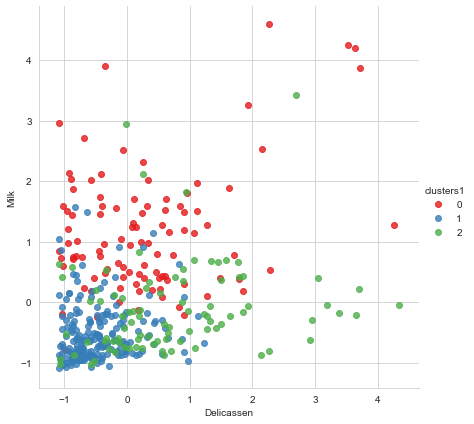

In [24]:
# Result scatterplot
sns.set_style('whitegrid')
sns.lmplot('Delicassen', 'Milk', data=dfs, hue='clusters1',
                     palette='Set1', height=6, aspect=1, fit_reg=False)

In [25]:
# Clusters count
dfs.clusters1.value_counts()

1    206
0    100
2     90
Name: clusters1, dtype: int64

Better view on clustred results

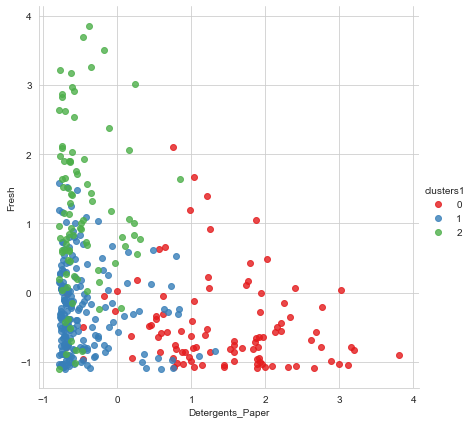

In [26]:
sns.set_style('whitegrid')
sns.lmplot('Detergents_Paper', 'Fresh', data=dfs, hue='clusters1',
                     palette='Set1', height=6, fit_reg=False)

PCA - Principal Component Analysis for clear result viz

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Text(0, 0.5, 'Second Principal Component')

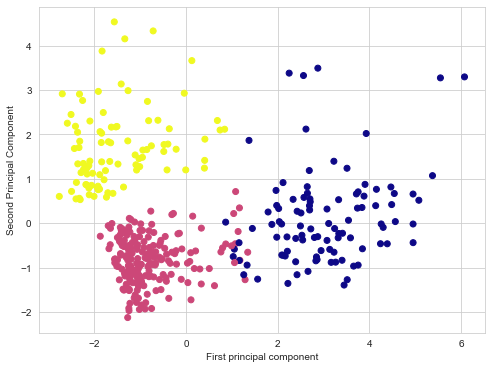

In [28]:
scaler = StandardScaler()
scaler.fit(dfs)
scaled_data = scaler.transform(dfs)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dfs['clusters1'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

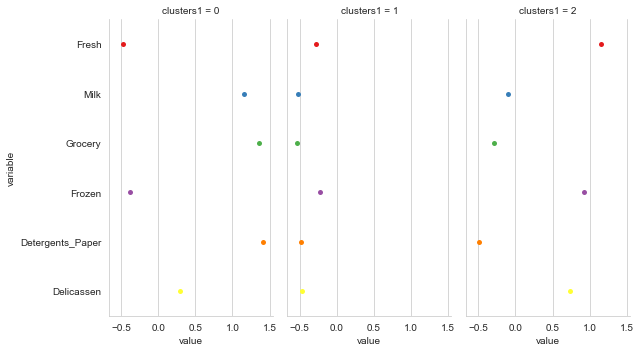

In [29]:
# Standardized values per category
temp = dfs.drop(['Channel'], axis=1).groupby('clusters1', as_index=False).mean()
temp_melted = temp.melt(id_vars='clusters1')

sns.catplot(y='variable', x='value', col='clusters1', kind='swarm', 
            data=temp_melted, aspect=0.6, palette='Set1')

# sns.stripplot(y='variable', x='value', hue='clusters22', data=tempp) # wszystkie klastry na jednym wykresie

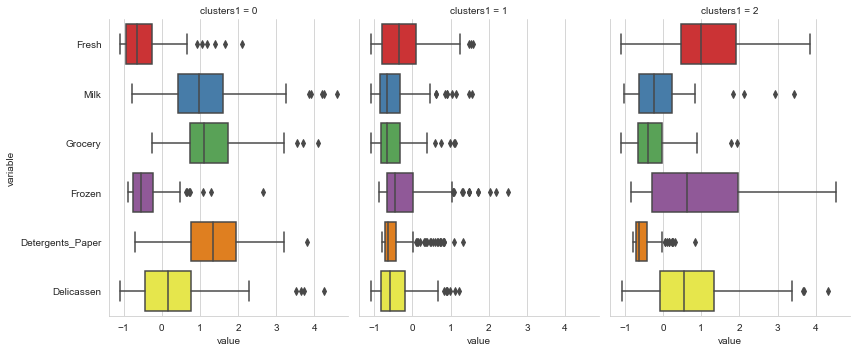

In [30]:
# Boxplots
temp_melted2 = dfs.drop(['Channel'], axis=1).melt(id_vars='clusters1')

sns.catplot(y='variable', x='value', col='clusters1', kind='box', data=temp_melted2, aspect=0.8, palette='Set1')